In [2]:
'''Data Analysis on Netflix Dataset'''

#import libraries required

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
plt.style.use('ggplot')
import re

data=pd.read_csv(r'E:\Netflix_DataAnalysis\netflix_titles.csv')



In [3]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<AxesSubplot:title={'center':'Types of shows on Netflix'}>

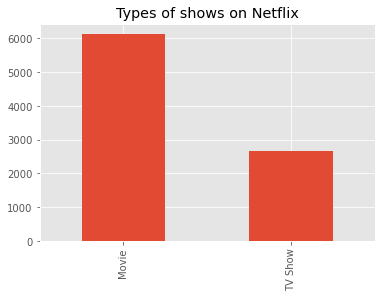

In [4]:
data['type'].value_counts().plot(kind='bar', title='Types of shows on Netflix')

Extract the top 10 directors by number of movies made from the dataset

In [5]:
#Extract the top 10 directors by number of movies made from the dataset

data.loc[data['type'] =='Movie', 'director'].value_counts().reset_index().head(10)

,index,director
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,15
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Steven Spielberg,11


In [6]:
data.loc[data['type'] == 'Movie', 'release_year'].value_counts()

2018    767
2017    767
2016    658
2019    633
2020    517
       ... 
1961      1
1947      1
1959      1
1963      1
1946      1
Name: release_year, Length: 73, dtype: int64

What is the tv show with maximum duration/seasons?

In [7]:
data.loc[data['type'] == 'TV Show', ['duration']].value_counts().reset_index()

,duration,0
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,4 Seasons,95
4,5 Seasons,65
5,6 Seasons,33
6,7 Seasons,23
7,8 Seasons,17
8,9 Seasons,9
9,10 Seasons,7


What is the most popular rating in TV shows?

In [8]:
data.loc[data['type'] == 'TV Show', 'rating'].value_counts().reset_index

<bound method Series.reset_index of TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64>

In [9]:
#Who is the most popular movie director from India?
pop_dir = data.loc[(data['country'] == 'India') & (data['type'] == 'Movie')]

In [10]:
pop_dir.loc[: , 'director'].value_counts()

David Dhawan                 9
Ram Gopal Varma              7
Anees Bazmee                 6
Rajkumar Santoshi            6
Imtiaz Ali                   6
                            ..
Sartaj Singh Pannu           1
Chakri Toleti                1
Phanindra Narsetti           1
Shivendra Singh Dungarpur    1
Saandeep Patel               1
Name: director, Length: 637, dtype: int64

In [11]:
# Which movie is the smallest movie ever made?
data.loc[(data['type'] == 'Movie') & (data['duration'] == '8 min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,"December 28, 2020",2020,PG-13,8 min,Dramas,Animation and activism unite in this multimedi...


In [12]:
#How many categories of ratings exist?
data.loc[:, 'rating'].nunique()

17

In [13]:
#How many movies and TV shows were added to Netflix each year?
data.groupby(['type', 'release_year']).nunique().loc[:, 'title'].reset_index()

,type,release_year,title
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


In [14]:
#Which country has produced the most number of movies?
num_movie = data.loc[(data['type'] == 'Movie')]
num_movie = num_movie.groupby(['country'])['title'].count().sort_values(ascending=False)
num_movie

country
United States                                                   2058
India                                                            893
United Kingdom                                                   206
Canada                                                           122
Spain                                                             97
                                                                ... 
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Sweden, Netherlands                                                1
Sweden, United Kingdom, Finland                                    1
Switzerland                                                        1
, France, Algeria                                                  1
Name: title, Length: 651, dtype: int64

In [15]:
# Which country has produced the most number of TV shows?

num_tvshow = data.loc[(data['type'] == 'TV Show')]
num_tvshow = num_tvshow.groupby('country')['title'].count().sort_values(ascending=False)
num_tvshow

country
United States                                760
United Kingdom                               213
Japan                                        169
South Korea                                  158
India                                         79
                                            ... 
South Korea, China                             1
South Korea, Canada, United States, China      1
Singapore, United States                       1
Senegal                                        1
, South Korea                                  1
Name: title, Length: 196, dtype: int64

In [16]:
# What is the most common duration for movies in the dataset?

movie_ds = data.loc[(data['type'] == 'Movie')]
movie_ds = movie_ds.groupby('duration')['title'].nunique().reset_index()
movie_ds = movie_ds.rename(columns={'title': 'number_of_titles'})
movie_ds.sort_values('number_of_titles', ascending=False)

,duration,number_of_titles
195,90 min,152
198,93 min,146
199,94 min,146
202,97 min,146
196,91 min,144
...,...,...
124,253 min,1
127,273 min,1
130,3 min,1
133,312 min,1


In [17]:
# How many unique directors are there in the dataset?

data.groupby('director')['title'].nunique().count()

4528